In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)

from sklearn.linear_model import LinearRegression
lm= LinearRegression()
x=df[['engine-size']]
y=df['price']

lm.fit(x,y)

y=lm.predict(x)


a=lm.intercept_
b=lm.coef_
print(a,b)


-7963.3389062810165 [166.86001569]


In [2]:
z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(z,df['price'])

a1=lm.intercept_
b1=lm.coef_

print(a1,b1)

-15806.624626329227 [53.49574423  4.70770099 81.53026382 36.05748882]


In [3]:
z=df[['normalized-losses','highway-mpg']]
lm.fit(z,df['price'])
a2=lm.intercept_
b2=lm.coef_

print(a2,b2)


38201.31327245729 [   1.49789586 -820.45434016]


TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

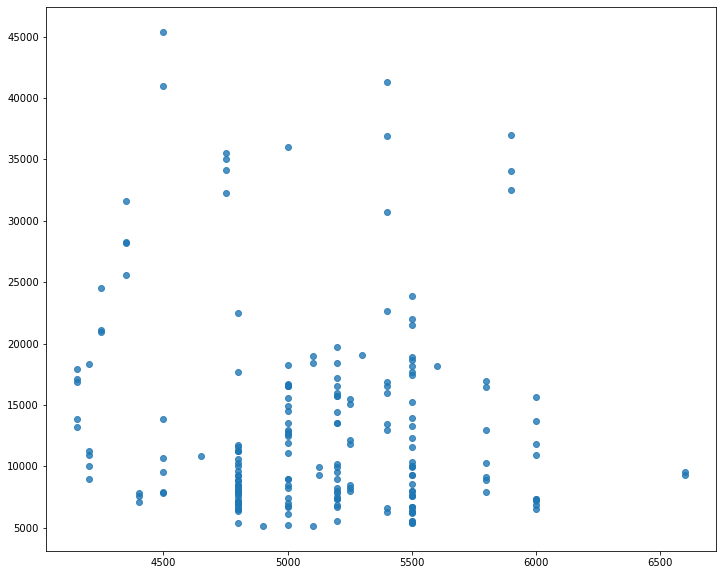

In [4]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.regplot(x='peak-rpm',y='price',data=df)


In [11]:
df[["highway-mpg","peak-rpm","price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


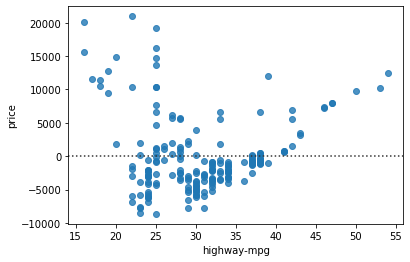

In [5]:
sns.residplot(x='highway-mpg',y='price',data=df)

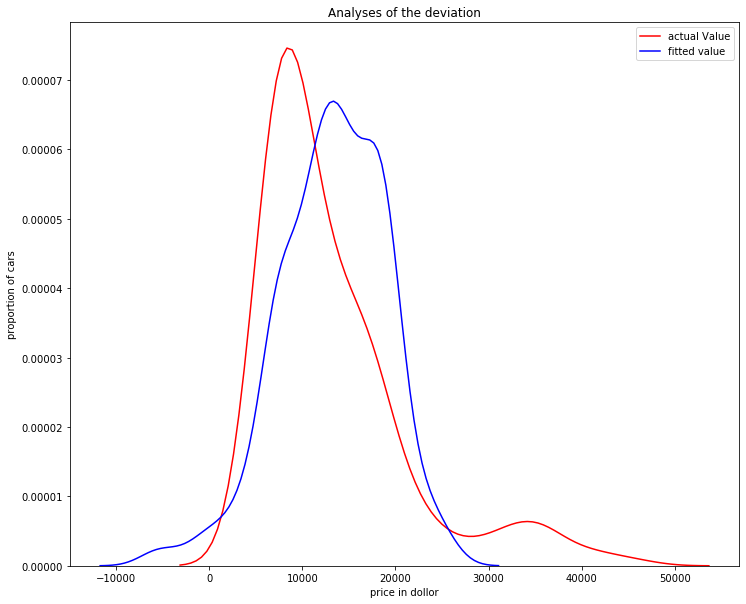

In [6]:
yhat=lm.predict(z)

plt.figure(figsize=(12,10))
ax1=sns.distplot(df['price'],hist=False,color='r', label='actual Value')
sns.distplot(yhat,hist=False,color='b',label='fitted value',ax=ax1)

plt.title("Analyses of the deviation")
plt.xlabel("price in dollor")
plt.ylabel("proportion of cars")
plt.show()
plt.close()

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


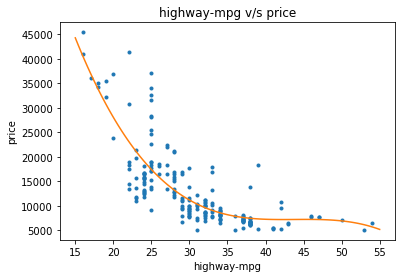

In [16]:
def pollymodel(mod,indep,dep):
    xnew=np.linspace(15, 55, 100)
    ynew=mod(xnew)
    
    plt.plot(indep,dep,'.',xnew,ynew,'-')
    plt.title('highway-mpg v/s price')
    plt.xlabel('highway-mpg')
    plt.ylabel('price')
    plt.show()
    plt.close()
    
x=df['highway-mpg']
y=df['price']

f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

pollymodel(p,x,y)


In [21]:
print(np.unique(x))

[16 17 18 19 20 22 23 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 41 42
 43 46 47 50 53 54]


In [33]:
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr
zpr=pr.fit_transform(z)
z.shape




(201, 4)

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Input=[('scale',StandardScaler()),('poly',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

pipe.fit(z,y)
ypipe=pipe.predict(z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [54]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=df[['horsepower']]
y=df['price']
lm.fit(x,y)
print(lm.score(x,y))

yhat=lm.predict(x)

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['price'],yhat)
print(mse)

0.6554109795391572
21654544.39825428


In [58]:
lm.fit(z,y)
yhat=lm.predict(z)
print(lm.score(z,y))
print(mean_squared_error(y,yhat))

from sklearn.metrics import r2_score
print(r2_score(y,p(x)))
print(mean_squared_error(y,p(x)))


0.8093562806577457
11980366.870726492
-54745.70923637478
3440373823379.2935


In [19]:
import matplotlib.pyplot as plt
import numpy as np

x=df[['highway-mpg']]
y=df['price']

lm.fit(x,y)
xnew=np.array(30.0).reshape(-1,1)
yhat=lm.predict(x)
print(yhat)


[16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508 17879.97140011 17879.97140011 17879.97140011
 21988.63829172 14593.03788682 14593.03788682 15414.77126514
 15414.77126514 17879.97140011 20345.17153508 20345.17153508
 21988.63829172 -5128.5631929   3088.77059031  3088.77059031
  4732.23734696  7197.43748192 13771.3045085   7197.43748192
  7197.43748192  7197.43748192 13771.3045085  13771.3045085
 18701.70477843 -5950.29657123  7197.43748192  3910.50396864
 10484.37099521 10484.37099521 10484.37099521 10484.37099521
 11306.10437353 11306.10437353 11306.10437353 11306.10437353
 15414.77126514 12949.57113018 14593.03788682 14593.03788682
 22810.37167004 22810.37167004 24453.83842668 12949.57113018
  7197.43748192  7197.43748192  7197.43748192  7197.43748192
 19523.43815675 19523.43815675 19523.43815675 19523.43815675
 12127.83775186 12127.83775186 12127.83775186 12127.83775186
  3910.50396864 12127.83775186 16236.50464347  6375.7041036
 17879.97140011 17879.97140